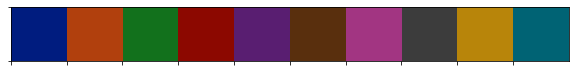

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import sklearn as skl
import requests
import re
from pandas import json_normalize
from validate_docbr import CNPJ

sns.set_palette('dark')
sns.palplot(sns.color_palette('dark'))

In [2]:
'Hoje é dia {}.'.format(dt.datetime.now().strftime('%d/%m/%Y'))

'Hoje é dia 06/05/2020.'

In [3]:
dados = pd.read_excel('Qualificação de Fornecedores.xlsx',sheet_name=11)

In [4]:
filter = ((dados['Razão social'] == 'AIR LIQUIDE BRASIL LTDA') | 
         (dados['Razão social'] == 'CIA ULTRAGAZ S/A') |
         (dados['Razão social'] == 'GAS NATURAL SAO PAULO SUL S/A') | 
        (dados['Razão social'] == 'PARK COMERCIO DE GAS LTDA'))
        
dadosGases = dados[filter]

In [5]:
print('O período avaliado corresponde de {} até {}.\nNeste cenário, estão sendo avaliados {} registros de notas fiscais ao todo.'.format((dadosGases['Data entrada NF'].min().strftime('%d/%m/%Y')),(dadosGases['Data entrada NF'].max().strftime('%d/%m/%Y')),(dadosGases.shape[0])))

O período avaliado corresponde de 04/04/2018 até 30/04/2020.
Neste cenário, estão sendo avaliados 431 registros de notas fiscais ao todo.


In [6]:
dadosGases.columns

Index(['L.Pedido', 'Pessoa física / jurídica?', '*Fornecedor', 'Razão social',
       'Data cadastramento', 'País', '*Código da cidade',
       'Descrição da cidade', 'UF', '*NF', 'Data emissão NF',
       'Data entrada NF', '*Aviso recebimento', 'Comprador', 'Pedido',
       'Ordem de compra', 'Item', 'Descrição do Item', 'Unidade de medida',
       'Preço unitário', 'Valor contábil', 'Quantidade recebida',
       'Quantidade devolvida', 'Data devolução', 'Nota fiscal de devolução',
       'Local de estoque do material', 'Tipo do item', 'Controla estoque',
       'Familia', 'Situação', 'Descrição Famílias', 'Semana',
       'Leadtime Entrega', 'Contabiliza?'],
      dtype='object')

In [7]:
pd.crosstab(dadosGases['Razão social'],
                            dadosGases['Descrição Famílias'],
                            values = dadosGases['Valor contábil'],
                            aggfunc='sum').replace(np.nan, '')

Descrição Famílias,GASES,MAT. SEGURANCA/DESP. P/ RATEIO,MATERIAIS DE EXPEDIENTE,MATERIAL DE MANUTENCAO
Razão social,,,,
AIR LIQUIDE BRASIL LTDA,382081,648.1,53709,11658.5
CIA ULTRAGAZ S/A,,47803.1,,
GAS NATURAL SAO PAULO SUL S/A,631719,,,
PARK COMERCIO DE GAS LTDA,95804.5,5189,,


In [14]:
pd.crosstab(dadosGases['Descrição do Item'],
            dadosGases['Unidade de medida'],
            values = dadosGases['Valor contábil'],
            aggfunc='sum').round(2).replace(np.nan, '')

Unidade de medida,KG,M3,PC,UN
Descrição do Item,,,,
ACETILENO ( RECARGA ) 9 KG,1043.36,,,
"ARGONIO SOLDA - CILINDRO 10,0M3",,392.77,,
ATAL C 21,,241085,,
GAS,,,,5189
GAS 20 KG P/ EMPILHADEIRA,,,,95804.5
GAS LIQUEFEITO,39072.5,,,
GAS LIQUEFEITO DE PETROLEO (GLP),8730.58,,,
GAS NATURAL,,631719,,
LASAL 1 N2 10 M3 1066,,10404.5,,


In [16]:
pd.DataFrame(dadosGases.groupby(['Razão social','Descrição do Item'])['Preço unitário'].describe().round(2))

count  \
Razão social                  Descrição do Item                         
AIR LIQUIDE BRASIL LTDA       ACETILENO ( RECARGA ) 9 KG          2.0   
                              ARGONIO SOLDA - CILINDRO 10,0M3     1.0   
                              ATAL C 21                         147.0   
                              LASAL 1 N2 10 M3 1066              24.0   
                              LASAL 2 CO2 25 KG 1013              1.0   
                              LASAL 2003 LIQUIDO                 16.0   
                              LASAL 201 CIL 1,5 M3                2.0   
                              LASAL 4 HE 7,5 M3 1046             15.0   
                              LOCACAO DE EQUIP.                  78.0   
                              OXIGENIO                            5.0   
                              OXIGENIO GASOSO                     1.0   
                              OXIGENIO LIQUIDO                    2.0   
                              SERV. C/MANUTENCAO                 25.0   
CIA ULTRAGAZ S/A              GAS LIQUEFEITO                     21.0   
                              GAS LIQUEFEITO DE PETROLEO (GLP)    6.0   
GAS NATURAL SAO PAULO SUL S/A GAS NATURAL                        24.0   
PARK COMERCIO DE GAS LTDA     GAS                                11.0   
                              GAS 20 KG P/ EMPILHADEIRA          50.0   

                                                                   mean  \
Razão social                  Descrição do Item                           
AIR LIQUIDE BRASIL LTDA       ACETILENO ( RECARGA ) 9 KG          55.04   
                              ARGONIO SOLDA - CILINDRO 10,0M3     34.57   
                              ATAL C 21                           14.95   
                              LASAL 1 N2 10 M3 1066               38.34   
                              LASAL 2 CO2 25 KG 1013              21.53   
                              LASAL 2003 LIQUIDO                   2.32   
                              LASAL 201 CIL 1,5 M3              7016.40   
                              LASAL 4 HE 7,5 M3 1046              79.80   
                              LOCACAO DE EQUIP.                  688.58   
                              OXIGENIO                            11.70   
                              OXIGENIO GASOSO                     10.43   
                              OXIGENIO LIQUIDO                    11.06   
                              SERV. C/MANUTENCAO                 465.09   
CIA ULTRAGAZ S/A              GAS LIQUEFEITO                       7.97   
                              GAS LIQUEFEITO DE PETROLEO (GLP)     8.23   
GAS NATURAL SAO PAULO SUL S/A GAS NATURAL                          3.67   
PARK COMERCIO DE GAS LTDA     GAS                                  6.47   
                              GAS 20 KG P/ EMPILHADEIRA          126.00   

                                                                   std  \
Razão social                  Descrição do Item                          
AIR LIQUIDE BRASIL LTDA       ACETILENO ( RECARGA ) 9 KG          1.11   
                              ARGONIO SOLDA - CILINDRO 10,0M3      NaN   
                              ATAL C 21                           0.49   
                              LASAL 1 N2 10 M3 1066               0.99   
                              LASAL 2 CO2 25 KG 1013               NaN   
                              LASAL 2003 LIQUIDO                  1.94   
                              LASAL 201 CIL 1,5 M3              302.35   
                              LASAL 4 HE 7,5 M3 1046              2.24   
                              LOCACAO DE EQUIP.                 365.88   
                              OXIGENIO                            0.45   
                              OXIGENIO GASOSO                      NaN   
                              OXIGENIO LIQUIDO                    0.22   
                              SERV. C/MANUTENCAO                 2

In [79]:
dadosGases.groupby(['Razão social','Descrição do Item','Unidade de medida'])['Quantidade recebida'].describe().round(2).replace(np.nan, '')

count  \
Razão social                  Descrição do Item                Unidade de medida          
AIR LIQUIDE BRASIL LTDA       ACETILENO ( RECARGA ) 9 KG       KG                   2.0   
                              ARGONIO SOLDA - CILINDRO 10,0M3  M3                   1.0   
                              ATAL C 21                        M3                 147.0   
                              LASAL 1 N2 10 M3 1066            M3                  24.0   
                              LASAL 2 CO2 25 KG 1013           KG                   1.0   
                              LASAL 2003 LIQUIDO               M3                  16.0   
                              LASAL 201 CIL 1,5 M3             M3                   2.0   
                              LASAL 4 HE 7,5 M3 1046           M3                  15.0   
                              LOCACAO DE EQUIP.                PC                  78.0   
                              OXIGENIO                         M3                   5.0   
                              OXIGENIO GASOSO                  M3                   1.0   
                              OXIGENIO LIQUIDO                 M3                   2.0   
                              SERV. C/MANUTENCAO               PC                  25.0   
CIA ULTRAGAZ S/A              GAS LIQUEFEITO                   KG                  21.0   
                              GAS LIQUEFEITO DE PETROLEO (GLP) KG                   6.0   
GAS NATURAL SAO PAULO SUL S/A GAS NATURAL                      M3                  24.0   
PARK COMERCIO DE GAS LTDA     GAS                              UN                  11.0   
                              GAS 20 KG P/ EMPILHADEIRA        UN                  50.0   

                                                                                     mean  \
Razão social                  Descrição do Item                Unidade de medida            
AIR LIQUIDE BRASIL LTDA       ACETILENO ( RECARGA ) 9 KG       KG                    9.50   
                              ARGONIO SOLDA - CILINDRO 10,0M3  M3                   10.00   
                              ATAL C 21                        M3                   96.97   
                              LASAL 1 N2 10 M3 1066            M3                   10.00   
                              LASAL 2 CO2 25 KG 1013           KG                   50.00   
                              LASAL 2003 LIQUIDO               M3                 3256.69   
                              LASAL 201 CIL 1,5 M3             M3                    1.40   
                              LASAL 4 HE 7,5 M3 1046           M3                    9.00   
                              LOCACAO DE EQUIP.                PC                    1.00   
                              OXIGENIO                         M3                   10.00   
                              OXIGENIO GASOSO                  M3                    3.00   
                              OXIGENIO LIQUIDO                 M3                   10.00   
                              SERV. C/MANUTENCAO               PC                    1.00   
CIA ULTRAGAZ S/A              GAS LIQUEFEITO                   KG                  232.24   
                              GAS LIQUEFEITO DE PETROLEO (GLP) KG                  176.33   
GAS NATURAL SAO PAULO SUL S/A GAS NATURAL                      M3                 7209.68   
PARK COMERCIO DE GAS LTDA     GAS                              UN                   72.73   
                              GAS 20 KG P/ EMPILHADEIRA        UN                   15.18   

                                                                                      std  \
Razão social                  Descrição do Item                Unidade de medida            
AIR LIQUIDE BRASIL LTDA       ACETILENO ( RECARGA ) 9 KG       KG                    2.12   
                              ARGONIO SOLDA - CILINDRO 10,0M3  M3                           
                            

In [35]:
filter = ((dadosGases['Razão social'] == 'GAS NATURAL SAO PAULO SUL S/A') &
         (dadosGases['Unidade de medida'] == 'M3'))
        
gasNaturalM3 = dadosGases[filter]

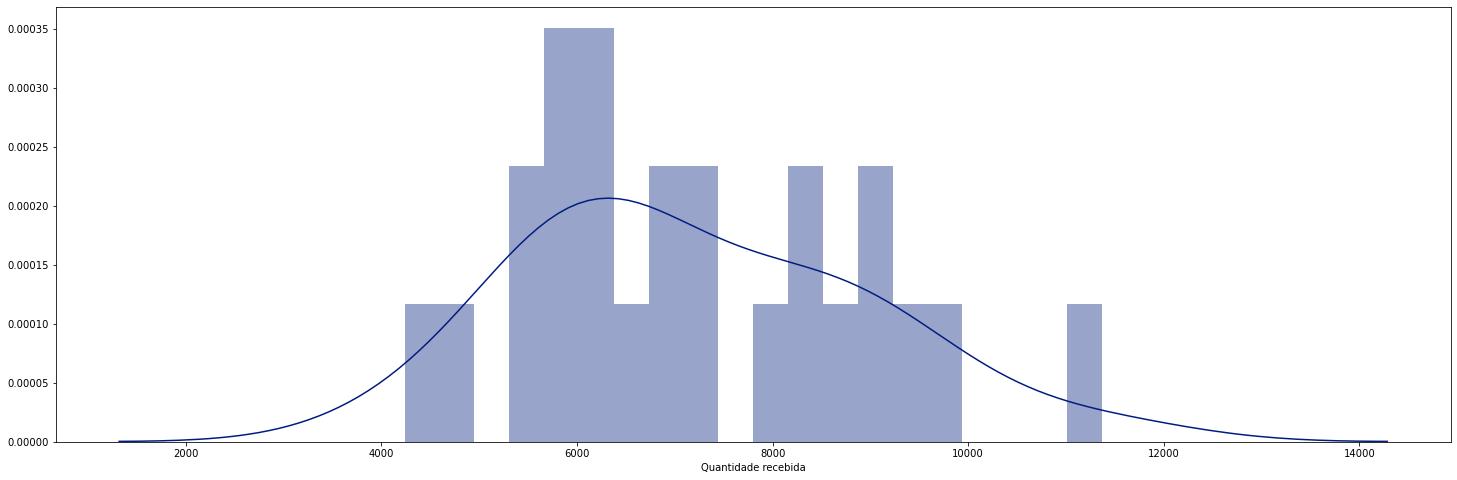

In [36]:
ax = plt.figure(figsize=(25, 8))
ax = sns.distplot(gasNaturalM3['Quantidade recebida'], bins=20)

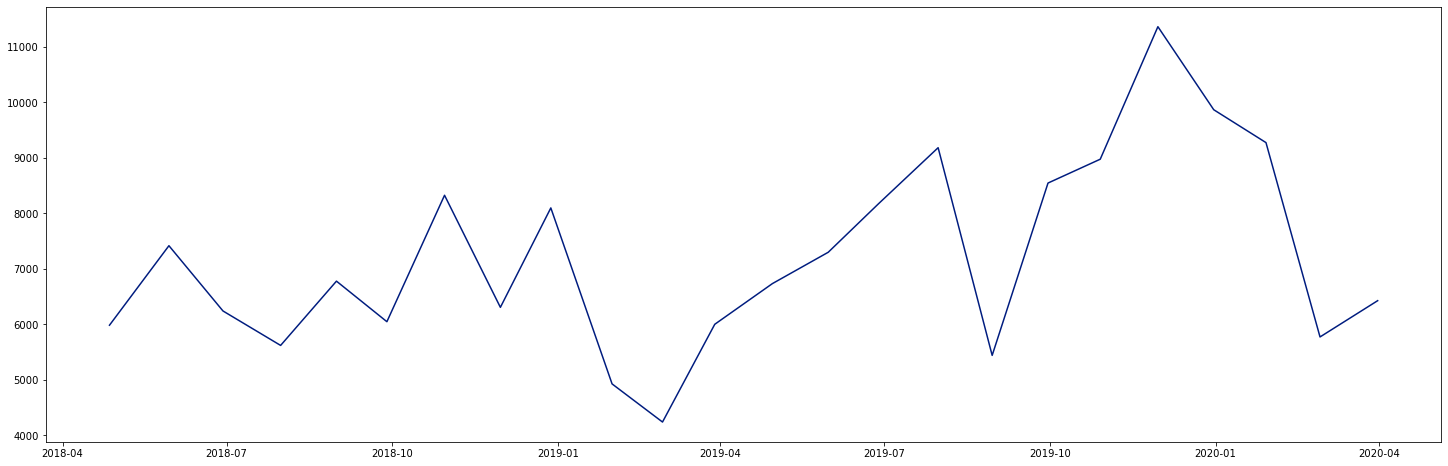

In [41]:
ax = plt.figure(figsize=(25, 8))
ax = plt.plot(gasNaturalM3['Data entrada NF'], gasNaturalM3['Quantidade recebida'])

In [63]:
gasNaturalM3.sort_values('Valor contábil', ascending=False).head().T

,5733,4461,2988,11787,7574
L.Pedido,196859,197480,198062,194001,196013
Pessoa física / jurídica?,J,J,J,J,J
*Fornecedor,2863830000178,2863830000178,2863830000178,2863830000178,2863830000178
Razão social,GAS NATURAL SAO PAULO SUL S/A,GAS NATURAL SAO PAULO SUL S/A,GAS NATURAL SAO PAULO SUL S/A,GAS NATURAL SAO PAULO SUL S/A,GAS NATURAL SAO PAULO SUL S/A
Data cadastramento,2004-02-19 00:00:00,2004-02-19 00:00:00,2004-02-19 00:00:00,2004-02-19 00:00:00,2004-02-19 00:00:00
País,1,1,1,1,1
*Código da cidade,SP838,SP838,SP838,SP838,SP838
Descrição da cidade,SOROCABA,SOROCABA,SOROCABA,SOROCABA,SOROCABA
UF,SP,SP,SP,SP,SP
*NF,4485,4688,4950,3672,4291


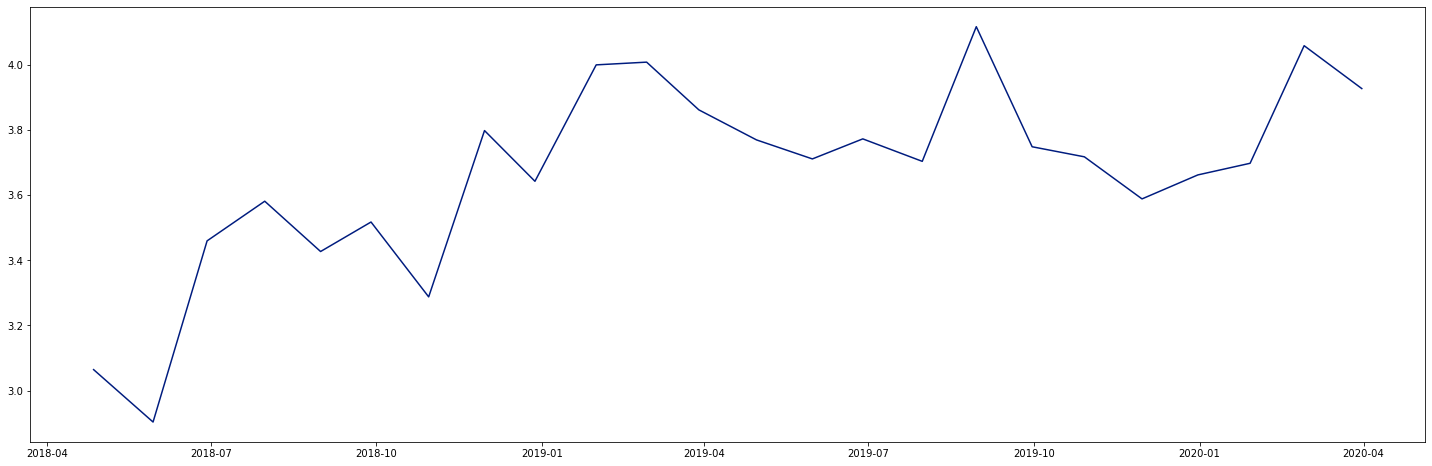

In [64]:
ax = plt.figure(figsize=(25, 8))
ax = plt.plot(gasNaturalM3['Data entrada NF'], gasNaturalM3['Preço unitário'])

In [78]:
gasNaturalM3.drop(['L.Pedido', '*Fornecedor','Pessoa física / jurídica?', 'Razão social', 'Data cadastramento',
       'País', '*Código da cidade','Descrição da cidade', 'UF', '*NF', 'Data emissão NF',
       'Data entrada NF', '*Aviso recebimento', 'Comprador', 'Pedido',
       'Ordem de compra', 'Item', 'Descrição do Item', 'Unidade de medida', 'Quantidade devolvida', 'Data devolução', 'Nota fiscal de devolução',
       'Local de estoque do material', 'Tipo do item', 'Controla estoque',
       'Familia', 'Situação', 'Descrição Famílias', 'Semana',
       'Leadtime Entrega', 'Contabiliza?'], axis=1).corr()

,Preço unitário,Valor contábil,Quantidade recebida
Preço unitário,1.000000,0.049629,-0.247419
Valor contábil,0.049629,1.000000,0.954319
Quantidade recebida,-0.247419,0.954319,1.000000
